<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing_chap_11_predict_customer_churn_IBM_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline 


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


As customers have more options for similar content to consume or similar products and
services to shop for, it has become more difficult for many businesses to retain their
customers and not lose them to other competitors. As the cost of acquiring new customers
is typically higher than that of retaining and keeping existing customers, customer churn is
becoming more and more of a concern than ever before. In order to retain existing
customers and not lose them to competitors, businesses should not only try to understand
their customers and their customers' needs and interests, but they should also be able to
identify which customers are highly likely to churn and how to retain these customers at
churn risk.

In this chapter, we are going to dive deeper into customer churn and how it hurts
businesses, as well as how to retain existing customers. We will discuss some of the
common reasons for customers leaving businesses and look at how data science can help
reduce the risk of losing customers. As a way of predicting customer churn, we will learn
about what an artificial neural network model is and its applications in different areas, as
well as how we can build one using Python and 

In [2]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

# Data analysis

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'].mean()

0.2653698707936959

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [8]:
df = df.dropna()

# Standard scaler

In [9]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


As you can see from the summary statistics, the three tenure, MonthlyCharges,
and TotalCharges continuous variables all have different scales. The
tenure variable, ranges from 1 to 72, while the TotalCharges variable , ranges
from 18.8 to 8684.8. ANN models typically perform better with scaled or
normalized features. Take a look at the following code for normalizing these three
features:

In [10]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

As you can see from this code, we apply log-transform first and then normalize
the continuous variables by subtracting by the mean and dividing the values by
standard deviations. The results look like the following:

In [11]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.028756e-16,4.688495e-14,7.150708e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.882268e+00,-2.579056e+00
25%,-9.542285e-01,-7.583727e-01,-6.080585e-01
50%,-1.394072e-01,3.885103e-01,1.950521e-01
75%,9.198605e-01,8.004829e-01,8.382338e-01
max,1.612459e+00,1.269576e+00,1.371323e+00


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.280157,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.054244,-2.281382,0
1,5575-GNVDE,Male,0,No,No,0.064298,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.032896,0.389269,0
2,3668-QPYBK,Male,0,No,No,-1.239416,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.061298,-1.452520,1
3,7795-CFOCW,Male,0,No,No,0.512450,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.467578,0.372439,0
4,9237-HQITU,Female,0,No,No,-1.239416,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.396862,-1.234860,1


As you see from this output, all the variables now have a mean of 0 and a
standard deviation of 1. We are going to use these normalized variables for future
model building.

# One hot encoding

In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [15]:
print(df.shape)
df.nunique()

(7032, 21)


customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

As this output suggests, there are 7032 unique customer IDs, 2 unique genders, 3 unique
values for MultipleLines, and 6530 unique values for TotalCharges. We have handled
the tenure, MonthlyCharges, and TotalCharges variables, in the previous step, so we
are going to focus on those variables with 2 to 4 unique values

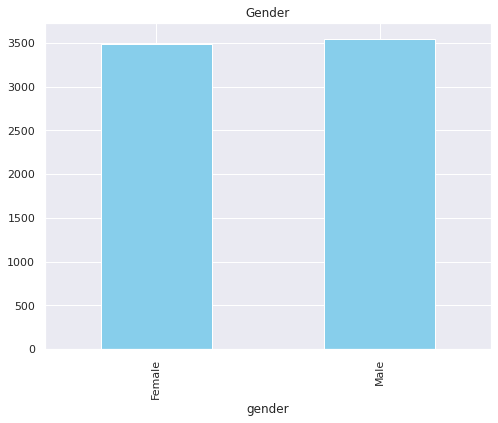

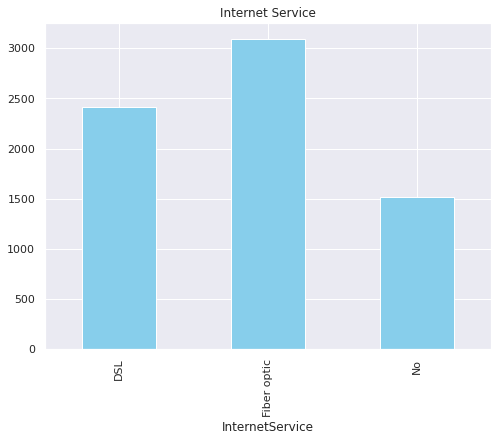

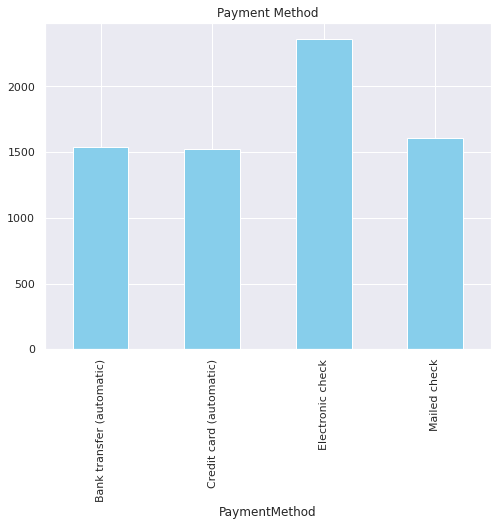

In [16]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [29]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,DependentsNo,DependentsYes,PhoneServiceNo,PhoneServiceYes,MultipleLinesNo,MultipleLinesNo phone service,MultipleLinesYes,InternetServiceDSL,InternetServiceFiber optic,InternetServiceNo,OnlineSecurityNo,OnlineSecurityNo internet service,OnlineSecurityYes,OnlineBackupNo,OnlineBackupNo internet service,OnlineBackupYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,TechSupportNo,TechSupportNo internet service,TechSupportYes,StreamingTVNo,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo,StreamingMoviesNo internet service,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064298,0.032896,0.389269,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.061298,-1.452520,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.467578,0.372439,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.396862,-1.234860,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,-0.994970,0.974468,-0.147808,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,-0.424595,0.786142,0.409363,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,-0.913487,-1.059891,-0.791550,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,-0.180148,1.059269,0.696733,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,1.205048,0.009088,0.783956,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [30]:
sample_set.shape

(7032, 47)

In [31]:
list(sample_set.columns)

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'genderFemale',
 'genderMale',
 'SeniorCitizen0',
 'SeniorCitizen1',
 'PartnerNo',
 'PartnerYes',
 'DependentsNo',
 'DependentsYes',
 'PhoneServiceNo',
 'PhoneServiceYes',
 'MultipleLinesNo',
 'MultipleLinesNo phone service',
 'MultipleLinesYes',
 'InternetServiceDSL',
 'InternetServiceFiber optic',
 'InternetServiceNo',
 'OnlineSecurityNo',
 'OnlineSecurityNo internet service',
 'OnlineSecurityYes',
 'OnlineBackupNo',
 'OnlineBackupNo internet service',
 'OnlineBackupYes',
 'DeviceProtectionNo',
 'DeviceProtectionNo internet service',
 'DeviceProtectionYes',
 'TechSupportNo',
 'TechSupportNo internet service',
 'TechSupportYes',
 'StreamingTVNo',
 'StreamingTVNo internet service',
 'StreamingTVYes',
 'StreamingMoviesNo',
 'StreamingMoviesNo internet service',
 'StreamingMoviesYes',
 'ContractMonth-to-month',
 'ContractOne year',
 'ContractTwo year',
 'PaperlessBillingNo',
 'PaperlessBillingYes',
 'PaymentMethodBank transfer (au

# Train & Test Sets

In [32]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

# Aritificial Neural Network (ANN) with Keras

In [34]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                752       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features], 
    sample_set[target_var], 
    test_size=0.3
)

In [36]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
4922/4922 [==============================] - 0s 75us/step - loss: 0.6876 - accuracy: 0.5506
Epoch 2/50
4922/4922 [==============================] - 0s 14us/step - loss: 0.4911 - accuracy: 0.7623
Epoch 3/50
4922/4922 [==============================] - 0s 13us/step - loss: 0.4337 - accuracy: 0.7970
Epoch 4/50
4922/4922 [==============================] - 0s 14us/step - loss: 0.4208 - accuracy: 0.8029
Epoch 5/50
4922/4922 [==============================] - 0s 14us/step - loss: 0.4149 - accuracy: 0.8070
Epoch 6/50
4922/4922 [==============================] - 0s 14us/step - loss: 0.4118 - accuracy: 0.8080
Epoch 7/50
4922/4922 [==============================] - 0s 14us/step - loss: 0.4092 - accuracy: 0.8100
Epoch 8/50
4922/4922 [==============================] - 0s 14us/step - loss: 0.4074 - accuracy: 0.8090
Epoch 9/50
4922/4922 [==============================] - 0s 14us/step - loss: 0.4055 - accuracy: 0.8096
Epoch 10/50
4922/4922 [==============================] - 0s 14us/step - l